In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    def feedforward(self, X):
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output
    def backward(self, X, y, learning_rate):
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            if epoch % 4000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss:{loss}")
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            if epoch % 4000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss:{loss}")
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

output = nn.feedforward(X)
print("Predictions after training:")
print(output)


Epoch 0, Loss:0.29061676753084925
Epoch 4000, Loss:0.023675292267607798
Epoch 8000, Loss:0.004697684630731957
Predictions after training:
[[0.02339928]
 [0.94153307]
 [0.94076485]
 [0.0731092 ]]


Accuracy: 0.95


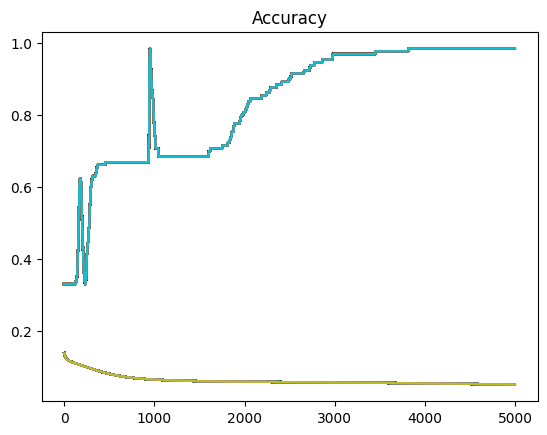

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target# Get dummy variable
y = pd.get_dummies(y).values

y[:3]#Split data into train and test data
x_train, x_test,  y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) # Initialize weights
np.random.seed(10)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()
for itr in range(iterations):

    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)


    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results.loc[len(results)] = {"mse": mse, "accuracy": acc}

    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)


    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update
    results.mse.plot(title="Mean Squared Error")

    results.accuracy.plot(title="Accuracy")# feedforward
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Define the features and target variable
features = [
    ["red", "large"],
    ["green", "small"],
    ["red", "small"],
    ["yellow", "large"],
    ["green", "large"],
    ["orange", "large"],
]
target_variable = ["apple", "lime", "strawberry", "banana", "grape", "orange"]

# Flatten the features list for encoding
flattened_features = [item for sublist in features for item in sublist]

# Use a single LabelEncoder for all features and target variable
le = LabelEncoder()
le.fit(flattened_features + target_variable)

# Encode features and target variable
encoded_features = [le.transform(item) for item in features]
encoded_target = le.transform(target_variable)

# Create a CART classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf.fit(encoded_features, encoded_target)

# Predict the fruit type for a new instance
new_instance = ["red", "large"]
encoded_new_instance = le.transform(new_instance)
predicted_fruit_type = clf.predict([encoded_new_instance])
decoded_predicted_fruit_type = le.inverse_transform(predicted_fruit_type)
print("Predicted fruit type:", decoded_predicted_fruit_type[0])


Predicted fruit type: apple


Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



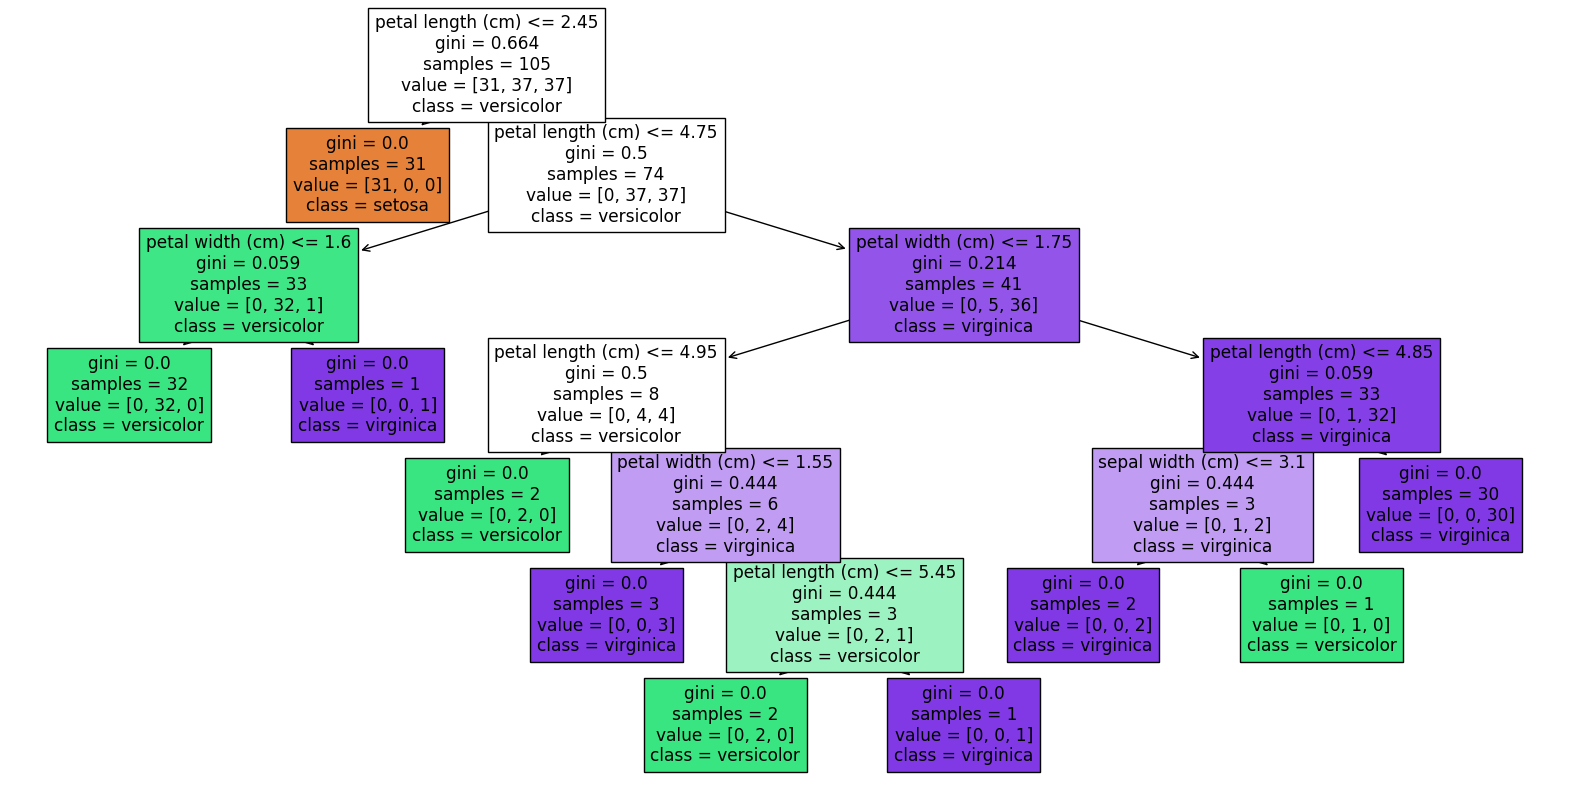

Mean Squared Error: 4976.797752808989
R^2 Score: 0.060653981041140725


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Convert to DataFrame for easier handling
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # Features
y = diabetes.target  # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create Decision Tree regressor object
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train Decision Tree Regressor
tree_regressor.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = tree_regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

